<a href="https://colab.research.google.com/github/DanielVictoriano/AC-Tareas_Victoriano/blob/main/Copia_de_Julia_Colab_Notebook_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-03-30 22:18:04 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake-avx512)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/lib64-nvidia
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  304.574 ms (2 allocations: 32.00 MiB)


In [3]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

Thu Mar 30 22:23:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Importamos el paquete "Pkg" para poder instalar paquetes
# Luego, instalamos el paquete "ThinkJulia"
using Pkg

Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed x265_jll ────────────────── v3.5.0+0
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed Libmount_jll ────────────── v2.35.0+0
   Installed LERC_jll ────────────────── v3.0.0+1
   Installed OffsetArrays ────────────── v1.12.9
   Installed Opus_jll ────────────────── v1.3.2+0
   Installed ImageMagick ─────────────── v0.7.9
   Installed Grisu ───────────────────── v1.0.2
   Installed Measures ────────────────── v0.3.2
   Installed Xorg_libpthread_stubs_jll ─ v0.1.0+3
   Installed RecipesPipeline ─────────── v0.1.13
   Installed Contour ─────────────────── v0.5.7
   Installed BFloat16s ───────────────── v0.2.0
   Installed Cairo_jll ───────────────── v1.16.1+1
   Installed Fontconfig_jll ──

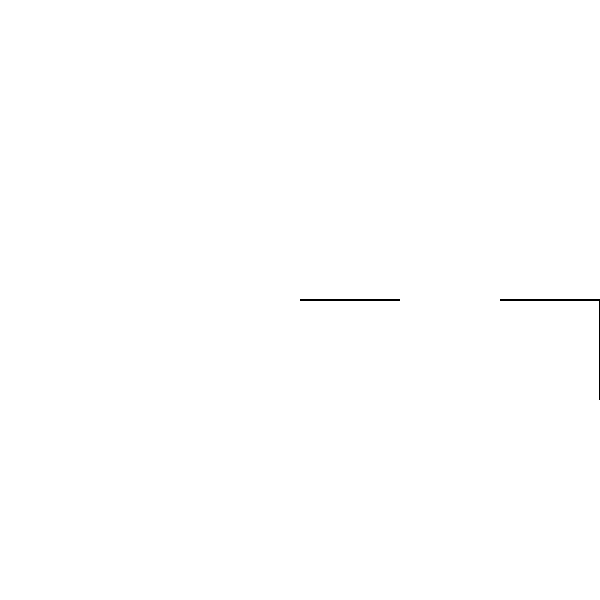

In [5]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 100

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    forward(🐢, d)
    penup(🐢)
    forward(🐢, d)
    pendown(🐢)
    forward(🐢, d)
    turn(🐢, 90)
    forward(🐢, d)
end

#=NOTA: '@svg' toma las instrucciones dentro del bloque 'begin' y genera un "gráfico
vectorizado escalable" (o svg, por sus siglas en inglés) con ellas, que luego Jupyter
nos muestra.=#

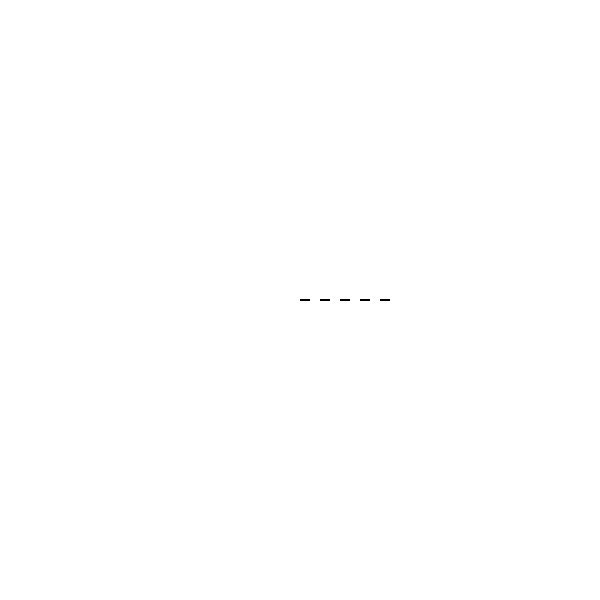

In [44]:
#Ejercicio Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia 
#cada una con 10 unidades de distancia entre ellas. 
#(Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 10

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
 forward(🐢,d)
 penup(🐢)
 forward(🐢,d)
 pendown(🐢)
  forward(🐢,d)
 penup(🐢)
 forward(🐢,d)
 pendown(🐢)
  forward(🐢,d)
 penup(🐢)
 forward(🐢,d)
 pendown(🐢)
  forward(🐢,d)
 penup(🐢)
 forward(🐢,d)
 pendown(🐢)
  forward(🐢,d)
 penup(🐢)
 forward(🐢,d)
 pendown(🐢)

end

#=NOTA: '@svg' toma las instrucciones dentro del bloque 'begin' y genera un "gráfico
vectorizado escalable" (o svg, por sus siglas en inglés) con ellas, que luego Jupyter
nos muestra.=#

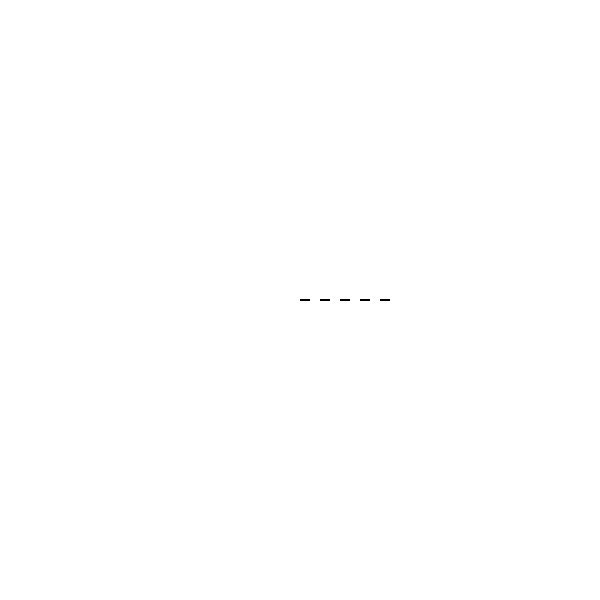

In [44]:
#Ejercicio Si no utilizaste un ciclo para resolver el ejercicio anterior,
# reescribe tu programa utilizando un ciclo for o while.


using ThinkJulia
x=1
# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()
d = 10



# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin

while x<=5   # mientras x sea menor o igual a 5 se ejecuta el ciclo

forward(🐢,d) #la tortuga avanza con el lapiz abajo una distancia d
 penup(🐢)  # la tortuga levanta el lapiz
 forward(🐢,d) #la tortuga continua avanzando
 pendown(🐢)  #la tortuga vuelve a bajar el lapiz



 x+=1  # incrementamos el valor en 1 para que se cumpla que x sea igual a 5, donde se detiene el ciclo
end
end


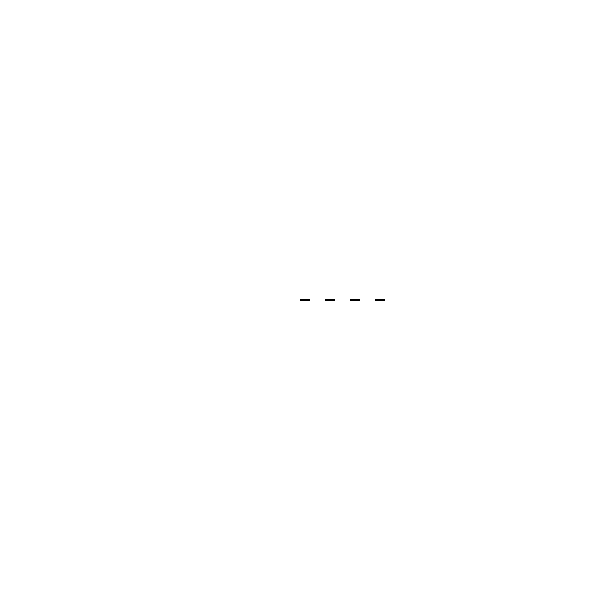

In [61]:
#Ejercicio Haz un programa que tome tres parámetros n, d1 y d2 (los cuales puedes definir como variables en la misma celda) 
#y dibuje n líneas de longitud d1 con una distancia de separación d2 entre ellas utilizando un ciclo for o while.

using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d1 = 10 #longitud de lineas
d2 = 15 #separacion entre lineas
n = 4 #numero de lineas

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    while n >= 1  #mientras n sea mayor o igual a 1 se ejecuta el ciclo
    
 forward(🐢,d1) #la tortuga avanza con el lapiz abajo la distancia d1
 penup(🐢)      #la tortuga levanta el lapiz 
 forward(🐢,d2)  #la tortuga avanza con el lapiz levantado una distancia d2
 pendown(🐢)     #la tortuga baja el lapiz



 n-=1   #el valor n disminuye para que se cumpla que llegue a ser igual a 1, donde el ciclo se detiene
end
end


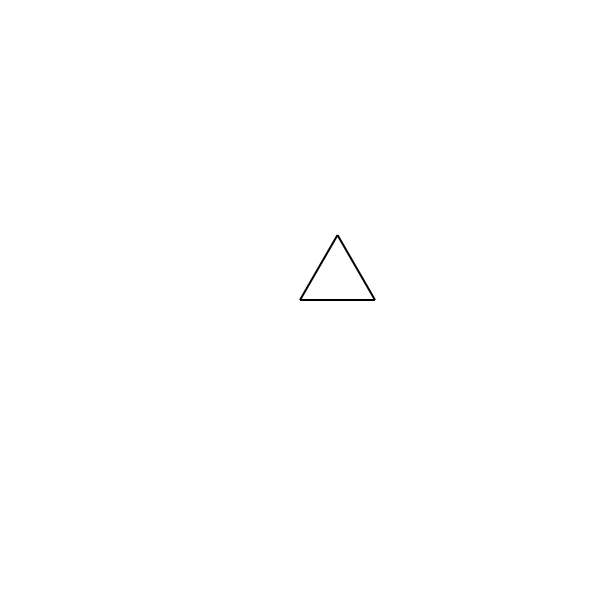

In [70]:
#Ejercicio Haz un programa que dibuje un triángulo equilátero de lado d.
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 75

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    forward(🐢, d) #la tortuga avanza la distancia d
    turn(🐢, -120) #la tortuga gira -120 grados
    forward(🐢, d) #la tortuga continua avanzando
   turn(🐢, -120) #la tortuga gira otros -120 grados
    forward(🐢, d) # la tortuga sigue avanzando la distancia d
  

 
end

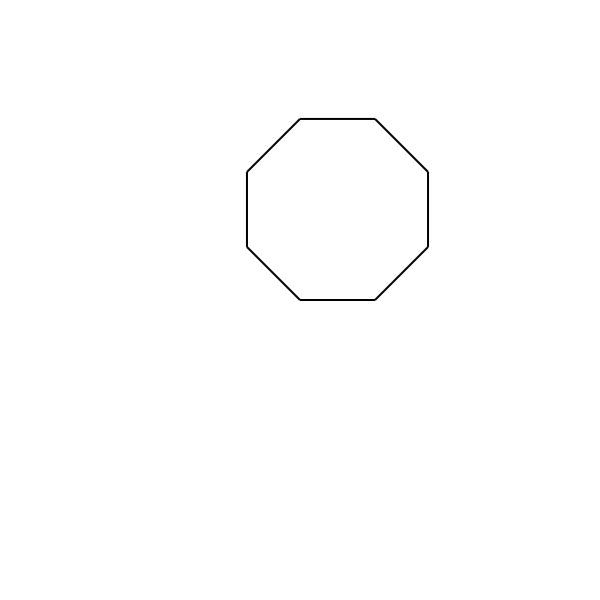

In [81]:
#Ejercicio Generaliza el programa anterior a uno que tome dos parámetros n y d y 
#dibuje un polígono regular de n lados de longitud d utilizando un ciclo for o while.

using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 75 #longitud de los lados del poligono
n = 8 #numero de lados

θ = -(360/n) #angulo que gira la tortuguita

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin


while n >= 1
    forward(🐢, d) #la tortuga avanza la distancia d
    turn(🐢, θ) #la tortuga gira θ grados
    
  
n -=1


end 
 
end

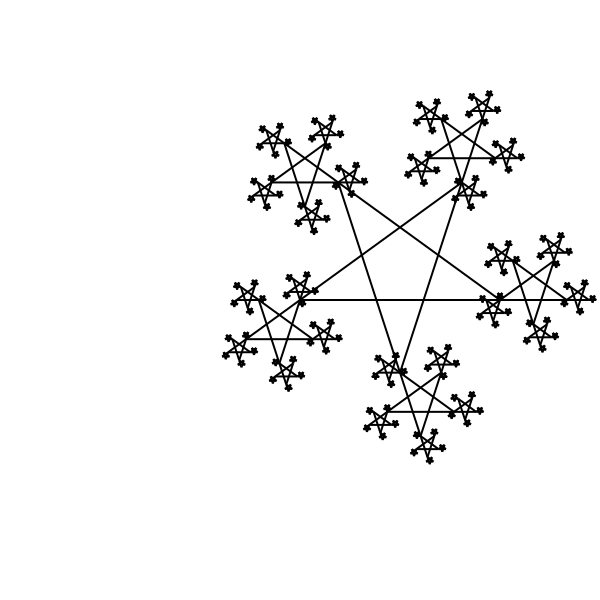

In [27]:
function estrella(tort,dist)      #Sintáxis compacta.
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg estrella(🐢,d) 

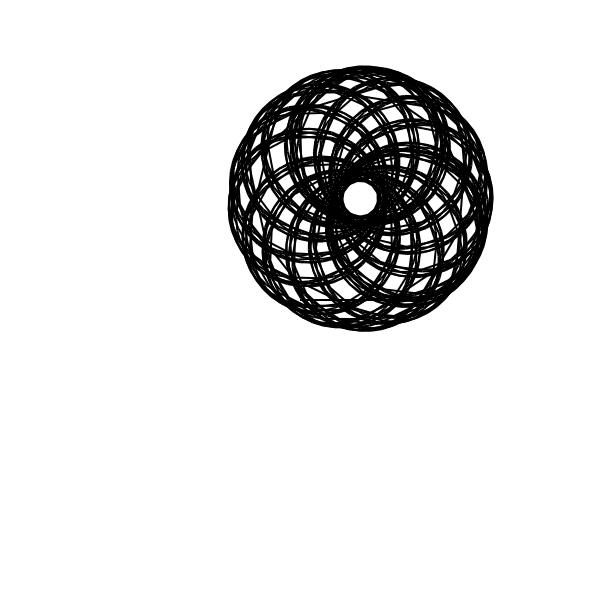

In [103]:
#Ejercicio Crea un fractal original con un ciclo recursivo.
function c(tort,dist)      #Sintáxis compacta.
    if dist <= 5
        return
    else
        for i in 1:15
            forward(tort,dist)
           turn(tort,-3pi)
            c(tort,dist/3)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg c(🐢,d) 

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />